<a href="https://colab.research.google.com/github/gukouk176-debug/colab2/blob/main/DataScience_10_ipynb_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第10回講義 分類３

+ 近傍法
+ ニューラルネットワーク
+ XGboost
+ （参考）ナイーブベイズ


## 全講義共通初期設定
+ 警告の非表示(実装時は非推奨)
+ numpy pandas小数点以下桁数の表示設定
+ pandas全データ表示設定
+ Google driveへの接続

In [1]:
# ワーニングを非表示にする
# この設定は不都合が見えなくなる為、お勧めしない
# 今回は教育資料用に、出力を簡素化する為に利用する
import warnings
warnings.simplefilter('ignore')

# モジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 小数点以下桁数の表示設定
np.set_printoptions(precision = 3)
pd.options.display.precision = 3

# pandasの全データ表示設定
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#google driveに接続
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#google driveと接続できたかを確認
!ls drive/MyDrive/DataScience

'3(00000).txt'	'3(00004).txt'		       iris.csv		   ファイル_000
'3(00001).txt'	 breast-cancer-wisconsin.csv   titanic_train.csv
'3(00002).txt'	 example.xlsx		      'wine 2.csv'
'3(00003).txt'	 imports-85.csv		       wine.csv


## K近傍法
+ タイタニックデータを用いる
+ 生存したかどうかを分類する

In [4]:
#タイタニックデータの読み込み
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

titanic_source_df = pd.read_csv('/content/drive/MyDrive/DataScience/titanic_train.csv',sep=',')

titanic_source_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [5]:
titanic_source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# すべての欠損値を平均で置換する、※数値型のみ
#titanic_df = titanic_source_df.fillna(titanic_source_df.mean())

#変数の設定
#X = titanic_df.iloc[:, [2,5,6,7,9]]
#y = titanic_df.iloc[:,[1]]

numeric_columns = titanic_source_df.select_dtypes(include=np.number).columns
titanic_df = titanic_source_df.copy() # 元のデータフレームを保護するためにコピーを作成
titanic_df[numeric_columns] = titanic_df[numeric_columns].fillna(titanic_df[numeric_columns].mean())

#変数の設定
X = titanic_df.iloc[:, [2,5,6,7,9]]
y = titanic_df.iloc[:,[1]]

In [10]:
#トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None )

#説明変数の標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
# k近傍法によるモデルの生成と学習
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('正解率（train):  {:.4f}'.format(knn.score(X_train_std, y_train)))
print('正解率（test):  {:.4f}'.format(knn.score(X_test_std, y_test)))

正解率（train):  0.8026
正解率（test):  0.7201


In [12]:
print(knn.predict(X_test_std))

[1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 1 1 1 0 0 0 1 0 0]


In [13]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

## ニューラルネットワークモデル（多層パーセプトロン）

In [14]:
#多層パーセプトロンによる学習
from sklearn.neural_network import MLPClassifier

#ニューラルネットワークモデル（多層パーセプトロン）による宣言と学習
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train_std,y_train)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('正解率（train):  {:.4f}'.format(mlp.score(X_train_std, y_train)))
print('正解率（test):  {:.4f}'.format(mlp.score(X_test_std, y_test)))

正解率（train):  0.7416
正解率（test):  0.7090


In [15]:
#パーセプトロンによる学習
from sklearn.linear_model import Perceptron

#ニューラルネットワークモデル（パーセプトロン）による宣言と学習
per = Perceptron(tol=1e-3, random_state=0)
per.fit(X_train_std, y_train)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('正解率（train):  {:.4f}'.format(per.score(X_train_std, y_train)))
print('正解率（test):  {:.4f}'.format(per.score(X_test_std, y_test)))

正解率（train):  0.6244
正解率（test):  0.6119


## XGboost

In [16]:
#Irisデータに対するXGBoostによる学習と計算結果
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_std, y_train)

predict = xgb_model.predict(X_test_std)

print('正解率： {:.4f}'.format(accuracy_score(predict,y_test)))

正解率： 0.7201


正解率： 0.6679


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

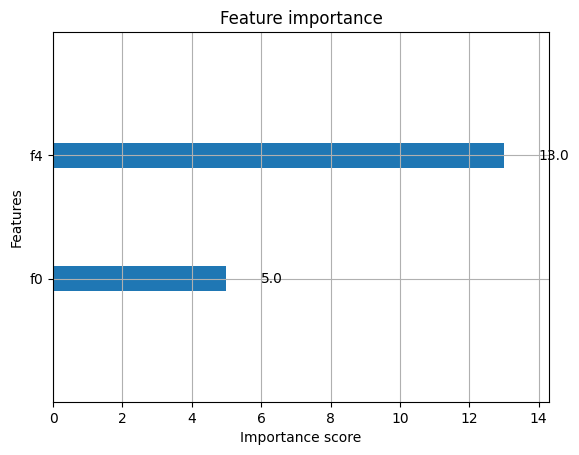

In [17]:
#別の書き方のXGBoosting．パラメータを設定．

#データをXGBoostに使えるように処理
xgb_train = xgb.DMatrix(X_train_std,label=y_train)
xgb_test = xgb.DMatrix(X_test_std, label=y_test)

#ハイパーパラメータ設定
params = {"objective":"multi:softmax","num_class":3,"max_depth":10,"learning_rate":0.1,'gamma': 10,'subsample': 0.8}

#XGBoostの学習
xgb_fit = xgb.train(params, xgb_train)

#テストデータによる精度評価
predict = xgb_fit.predict(xgb_test)
print('正解率： {:.4f}'.format(accuracy_score(predict,y_test)))

# 特徴量の重要度を表示
xgb.plot_importance(xgb_fit)

In [18]:
help(xgb)

Help on package xgboost:

NAME
    xgboost - XGBoost: eXtreme Gradient Boosting library.

DESCRIPTION
    Contributors: https://github.com/dmlc/xgboost/blob/master/CONTRIBUTORS.md

PACKAGE CONTENTS
    _data_utils
    _typing
    callback
    collective
    compat
    config
    core
    dask (package)
    data
    federated
    libpath
    plotting
    sklearn
    spark (package)
    testing (package)
    tracker
    training

CLASSES
    abc.ABC(builtins.object)
        xgboost.core.DataIter
    builtins.object
        xgboost.core.Booster
        xgboost.core.DMatrix
            xgboost.core.ExtMemQuantileDMatrix(xgboost.core.DMatrix, xgboost.core._RefMixIn)
            xgboost.core.QuantileDMatrix(xgboost.core.DMatrix, xgboost.core._RefMixIn)
        xgboost.tracker.RabitTracker
    sklearn.base.BaseEstimator(sklearn.utils._estimator_html_repr._HTMLDocumentationLinkMixin, sklearn.utils._metadata_requests._MetadataRequester)
        xgboost.sklearn.XGBModel
            xgboost.sklea

## （参考）ナイーブベイズ

In [19]:
#ナイーブベイズによる学習と計算結果
from sklearn.naive_bayes import GaussianNB

#ナイーブベイズによる宣言と学習
gnb = GaussianNB()
gnb.fit(X_train_std,y_train)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('正解率（train):  {:.4f}'.format(gnb.score(X_train_std, y_train)))
print('正解率（test):  {:.4f}'.format(gnb.score(X_test_std, y_test)))

正解率（train):  0.6934
正解率（test):  0.7015


In [20]:
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |
 |  Gaussian Naive Bayes (GaussianNB).
 |
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see `Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque
 |  <http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf>`_.
 |
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,), default=None
 |      Prior probabilities of the classes. If specified, the priors are not
 |      adjusted according to the data.
 |
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |
 |      .. versionadded:: 0.20
 |
 |  Attributes
 |  ----------
 |  cla

## 演習1．　乳がんデータに対してk近傍法を適用

In [21]:
# 乳がんデータの読み込み
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

#csvファイルの読み込み
bc_source_df = pd.read_csv('/content/drive/MyDrive/DataScience/breast-cancer-wisconsin.csv',sep=',')

# 欠損文字の置換
bc_df = bc_source_df.replace("?", "5")

# 数値への置換
bc_df = bc_df.astype({'Bare Nuclei':'int64'})

#変数の設定（説明変数は適当に選択）
X = bc_df.iloc[:, [1,2,3,4,5,6,7,8,9]]
y = bc_df.iloc[:,[10]]

# k近傍法の適用
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('正解率（train):  {:.4f}'.format(knn.score(X_train_std, y_train)))
print('正解率（test):  {:.4f}'.format(knn.score(X_test_std, y_test)))




正解率（train):  0.8026
正解率（test):  0.7201


## 演習2．　乳がんデータに対してニューラルネットワークを適用

In [22]:
# データは演習１を利用
#多層パーセプトロンによる学習
from sklearn.neural_network import MLPClassifier

#ニューラルネットワークモデル（多層パーセプトロン）による宣言と学習
knn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
knn.fit(X_train_std,y_train)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('正解率（train):  {:.4f}'.format(knn.score(X_train_std, y_train)))
print('正解率（test):  {:.4f}'.format(knn.score(X_test_std, y_test)))


正解率（train):  0.7416
正解率（test):  0.7090


## 演習3．　乳がんデータに対してXGBoostを適用

In [23]:
# データは演習１を利用
import xgboost as xgb

knn = xgb.XGBClassifier()
knn.fit(X_train_std, y_train)

predict = knn.predict(X_test_std)

print('正解率： {:.4f}'.format(accuracy_score(predict,y_test)))


正解率： 0.7201


## 演習4．　乳がんデータに対してナイーブベイズを適用

In [24]:
# データは演習１を利用
from sklearn.naive_bayes import GaussianNB

#ナイーブベイズによる宣言と学習
knn = GaussianNB()
knn.fit(X_train_std,y_train)

#トレーニングデータによるフィッティング結果とテストデータによる学習モデルの精度の検証
print('正解率（train):  {:.4f}'.format(knn.score(X_train_std, y_train)))
print('正解率（test):  {:.4f}'.format(knn.score(X_test_std, y_test)))


正解率（train):  0.6934
正解率（test):  0.7015
